# Table Bureau

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [2]:
bureau = pd.DataFrame(pd.read_csv('C:/Users/kalin/bureau.csv'))
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [3]:
bureau.shape

(1716428, 17)

In [4]:
prof = ProfileReport(bureau)
prof.to_file(output_file='rapport_bureau.html')

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

C:\Users\kalin\anaconda3\envs\OCR5\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# traitement des données manquantes 

In [5]:
# pourcentage de données manquantes de chaque variables :
count = bureau.isnull().sum().sort_values(ascending=False)
percentage = ((bureau.isnull().sum()/len(bureau)*100)).sort_values(ascending=False)
missing_bureau = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values s:')
missing_bureau

Count and percentage of missing values s:


,Count,Percentage
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


In [6]:
# variables ayant plus de 50% de DM
missing_bureau_sup50=missing_bureau[missing_bureau['Percentage'] > 50]
missing_bureau_sup50

,Count,Percentage
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264


In [7]:
#suppression des 29 varibles avec plus de 50% de DM 

liste = missing_bureau_sup50.index.tolist()

bureau_ssDM = bureau.drop(liste, axis=1)
bureau_ssDM

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0,91323.00,0.0,NaN,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0,11250.00,11250.0,0.0,0.0,Microloan,-19
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,0,15570.00,NaN,NaN,0.0,Consumer credit,-967
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508


In [8]:
#variables aynat des données manquantes < 50% dans bureau_ssDM
bureau_ssDM.columns[bureau_ssDM.isnull().any()]


Index(['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT'],
      dtype='object')

In [9]:
# Remplacer en utilisant la médiane

def DM_mediane (data, var):
    median = data[var].median()
    data[var].fillna(median, inplace=True)

In [10]:
DM_mediane(bureau_ssDM, 'DAYS_CREDIT_ENDDATE')
DM_mediane(bureau_ssDM, 'DAYS_ENDDATE_FACT')
DM_mediane(bureau_ssDM, 'AMT_CREDIT_SUM')
DM_mediane(bureau_ssDM, 'AMT_CREDIT_SUM_DEBT')
DM_mediane(bureau_ssDM, 'AMT_CREDIT_SUM_LIMIT')
                

In [11]:
bureau_ssDM

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0,91323.00,0.0,0.0,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.0,-897.0,0,225000.00,171342.0,0.0,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,528.0,-897.0,0,464323.50,0.0,0.0,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,-330.0,-897.0,0,90000.00,0.0,0.0,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,-897.0,0,2700000.00,0.0,0.0,0.0,Consumer credit,-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,-897.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,0,15570.00,0.0,0.0,0.0,Consumer credit,-967
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508


In [12]:
#pandas profiling 

prof = ProfileReport(bureau_ssDM)
prof.to_file(output_file='rapport_bureau_ssDM.html')

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

C:\Users\kalin\anaconda3\envs\OCR5\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
bureau_ssDM.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
       'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE'],
      dtype='object')

# transformation 

In [14]:
to_log=['CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG','AMT_CREDIT_SUM','AMT_CREDIT_SUM_OVERDUE']

In [15]:
bureau_ssDM_log = bureau_ssDM[to_log].applymap(lambda x: np.log(x+1))
bureau_ssDM_log

,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
0,0.0,0.0,11.422169,0.0
1,0.0,0.0,12.323860,0.0
2,0.0,0.0,13.048339,0.0
3,0.0,0.0,11.407576,0.0
4,0.0,0.0,14.808763,0.0
...,...,...,...,...
1716423,0.0,0.0,9.328212,0.0
1716424,0.0,0.0,10.548805,0.0
1716425,0.0,0.0,9.653165,0.0
1716426,0.0,0.0,10.491302,0.0


In [16]:
#suppression des  variables à transformer dans la table application_train_ssDM 
bureau_ssDM = bureau_ssDM.drop(to_log, axis=1)
bureau_ssDM

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,-153.0,-153.0,0.0,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,1075.0,-897.0,171342.0,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,528.0,-897.0,0.0,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,-330.0,-897.0,0.0,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,1197.0,-897.0,0.0,0.0,Consumer credit,-21
...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,-30.0,-897.0,11250.0,0.0,Microloan,-19
1716424,100044,5057754,Closed,currency 1,-2648,-2433.0,-2493.0,0.0,0.0,Consumer credit,-2493
1716425,100044,5057762,Closed,currency 1,-1809,-1628.0,-970.0,0.0,0.0,Consumer credit,-967
1716426,246829,5057770,Closed,currency 1,-1878,-1513.0,-1513.0,0.0,0.0,Consumer credit,-1508


In [17]:
#ajout des varaibales transformées dans la table application_train_ssDM 
bureau_ssDM2 = pd.concat([bureau_ssDM, bureau_ssDM_log], axis=1)
bureau_ssDM2

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,CREDIT_TYPE,DAYS_CREDIT_UPDATE,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
0,215354,5714462,Closed,currency 1,-497,-153.0,-153.0,0.0,0.0,Consumer credit,-131,0.0,0.0,11.422169,0.0
1,215354,5714463,Active,currency 1,-208,1075.0,-897.0,171342.0,0.0,Credit card,-20,0.0,0.0,12.323860,0.0
2,215354,5714464,Active,currency 1,-203,528.0,-897.0,0.0,0.0,Consumer credit,-16,0.0,0.0,13.048339,0.0
3,215354,5714465,Active,currency 1,-203,-330.0,-897.0,0.0,0.0,Credit card,-16,0.0,0.0,11.407576,0.0
4,215354,5714466,Active,currency 1,-629,1197.0,-897.0,0.0,0.0,Consumer credit,-21,0.0,0.0,14.808763,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,-30.0,-897.0,11250.0,0.0,Microloan,-19,0.0,0.0,9.328212,0.0
1716424,100044,5057754,Closed,currency 1,-2648,-2433.0,-2493.0,0.0,0.0,Consumer credit,-2493,0.0,0.0,10.548805,0.0
1716425,100044,5057762,Closed,currency 1,-1809,-1628.0,-970.0,0.0,0.0,Consumer credit,-967,0.0,0.0,9.653165,0.0
1716426,246829,5057770,Closed,currency 1,-1878,-1513.0,-1513.0,0.0,0.0,Consumer credit,-1508,0.0,0.0,10.491302,0.0


In [18]:
bureau_ssDM2.columns[bureau_ssDM2.isnull().any()]

Index([], dtype='object')

# Données abérrantes 

In [19]:
#pandas profiling 

prof = ProfileReport(bureau_ssDM2)
prof.to_file(output_file='rapport_bureau_ssDM2.html')

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

C:\Users\kalin\anaconda3\envs\OCR5\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='DAYS_CREDIT_ENDDATE', ylabel='Count'>

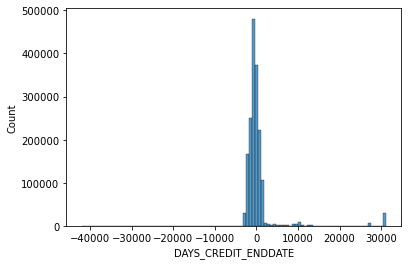

In [20]:
sns.histplot(data=bureau_ssDM2, x="DAYS_CREDIT_ENDDATE",bins=100)

In [21]:
DAYS_CREDIT_ENDDATE_abberante=bureau_ssDM2[bureau_ssDM2['DAYS_CREDIT_ENDDATE'] > 20000]
DAYS_CREDIT_ENDDATE_abberante['DAYS_CREDIT_ENDDATE']

5          27460.0
141        31111.0
180        27460.0
241        31081.0
393        27460.0
            ...   
1716322    31092.0
1716359    31090.0
1716379    31129.0
1716417    31128.0
1716422    31129.0
Name: DAYS_CREDIT_ENDDATE, Length: 38454, dtype: float64

2% de données abbérantes ==> on supprime

In [22]:
#Suppression des données abérrantes 

indexNames = bureau_ssDM2[bureau_ssDM2['DAYS_CREDIT_ENDDATE'] > 20000].index
bureau_ssDM2.drop(indexNames , inplace=True)
bureau_ssDM2

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,CREDIT_TYPE,DAYS_CREDIT_UPDATE,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
0,215354,5714462,Closed,currency 1,-497,-153.0,-153.0,0.0,0.0,Consumer credit,-131,0.0,0.0,11.422169,0.0
1,215354,5714463,Active,currency 1,-208,1075.0,-897.0,171342.0,0.0,Credit card,-20,0.0,0.0,12.323860,0.0
2,215354,5714464,Active,currency 1,-203,528.0,-897.0,0.0,0.0,Consumer credit,-16,0.0,0.0,13.048339,0.0
3,215354,5714465,Active,currency 1,-203,-330.0,-897.0,0.0,0.0,Credit card,-16,0.0,0.0,11.407576,0.0
4,215354,5714466,Active,currency 1,-629,1197.0,-897.0,0.0,0.0,Consumer credit,-21,0.0,0.0,14.808763,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,-30.0,-897.0,11250.0,0.0,Microloan,-19,0.0,0.0,9.328212,0.0
1716424,100044,5057754,Closed,currency 1,-2648,-2433.0,-2493.0,0.0,0.0,Consumer credit,-2493,0.0,0.0,10.548805,0.0
1716425,100044,5057762,Closed,currency 1,-1809,-1628.0,-970.0,0.0,0.0,Consumer credit,-967,0.0,0.0,9.653165,0.0
1716426,246829,5057770,Closed,currency 1,-1878,-1513.0,-1513.0,0.0,0.0,Consumer credit,-1508,0.0,0.0,10.491302,0.0


In [23]:
bureau_ssDM2.to_csv('C:/Users/kalin/bureau_prepared.csv')

# Preprocess bureau.csv and bureau_balance.csv

In [2]:
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [28]:
def bureau_and_balance(num_rows = None, nan_as_category = True):
    bureau = pd.read_csv('C:/Users/kalin/bureau_prepared.csv', nrows = num_rows)
    bb = pd.read_csv('C:/Users/kalin/bureau_balance_prepared.csv', nrows = num_rows)
    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    
    # Bureau and bureau_balance numeric features
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        #'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        #'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    
    return bureau_agg

In [29]:
bureau_and_balance_FE = bureau_and_balance(num_rows = None, nan_as_category = True)
bureau_and_balance_FE

,BURO_DAYS_CREDIT_MIN,BURO_DAYS_CREDIT_MAX,BURO_DAYS_CREDIT_MEAN,BURO_DAYS_CREDIT_VAR,BURO_DAYS_CREDIT_ENDDATE_MIN,BURO_DAYS_CREDIT_ENDDATE_MAX,BURO_DAYS_CREDIT_ENDDATE_MEAN,BURO_DAYS_CREDIT_UPDATE_MEAN,BURO_CREDIT_DAY_OVERDUE_MAX,BURO_CREDIT_DAY_OVERDUE_MEAN,...,CLOSED_AMT_CREDIT_SUM_DEBT_MEAN,CLOSED_AMT_CREDIT_SUM_DEBT_SUM,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_SUM,CLOSED_CNT_CREDIT_PROLONG_SUM,CLOSED_MONTHS_BALANCE_MIN_MIN,CLOSED_MONTHS_BALANCE_MAX_MAX,CLOSED_MONTHS_BALANCE_SIZE_MEAN,CLOSED_MONTHS_BALANCE_SIZE_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-735.000000,240043.666667,-1329.0,1778.0,82.428571,-93.142857,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,-51.0,0.0,35.000000,140.0
100002,-1437,-103,-874.000000,186150.000000,-1072.0,780.0,-344.250000,-499.875000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,-47.0,0.0,15.000000,90.0
100003,-2586,-606,-1400.750000,827783.583333,-2434.0,1216.0,-544.500000,-816.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.0
100004,-1326,-408,-867.000000,421362.000000,-595.0,-382.0,-488.500000,-532.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.0
100005,-373,-62,-190.666667,26340.333333,-128.0,1324.0,439.333333,-54.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,-12.0,0.0,13.000000,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,-2713,-483,-1667.076923,407302.243590,-2499.0,1363.0,-1162.923077,-1064.538462,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.0
456250,-1002,-760,-862.000000,15724.000000,-272.0,2340.0,1288.333333,-60.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,-32.0,0.0,33.000000,33.0
456253,-919,-713,-867.500000,10609.000000,-189.0,1113.0,280.500000,-253.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,-30.0,0.0,31.000000,62.0


# Fichier CSV

In [31]:
bureau_and_balance_FE.to_csv('C:/Users/kalin/bureau_and_balance_FE.csv')